# Ου Καλόν Είναι τον Άνθρωπον Μόνον
---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Θα δούμε μια σειρά από βασικά διαγράμματα με τη βιβλιοθήκη [seaborn](https://seaborn.pydata.org/) χρησιμοποιώντας δεδομένα από την έρευνα NATSAL ([National Survey of Sexual Attitudes and Lifestyles](http://www.natsal.ac.uk)) που διεξάγεται στο Ηνωμένο Βασίλειο.

* Ειδικότερα, θα διερευνήσουμε τον αριθμό των ετερόφυλων ερωτικών συντρόφων που αναφέρουν άνδρες και γυναίκες ηλικίας 35-44.

* Τα δεδομένα προέρχονται από τον [ιστότοπο](https://github.com/dspiegel29/ArtofStatistics/) που συνοδεύει το εξαιρετικό βιβλίο του David Spiegelhalter *The Art of Statistics*.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
natsal = pd.read_csv('data/natsal_het_sex_partners.csv')
natsal

,NumPartners,Sex
0,1,F
1,10,F
2,4,F
3,20,M
4,8,M
...,...,...
1984,2,M
1985,6,M
1986,8,F
1987,12,M


* Ας πάρουμε μια συνολική εικόνα του αριθμού των συντρόφων, ανά φύλο.

In [5]:
natsal.groupby('Sex').describe()

NumPartners                                                  
          count       mean        std  min  25%  50%   75%    max
Sex                                                              
F        1193.0   8.230511  17.955052  0.0  2.0  5.0  10.0  550.0
M         796.0  16.978643  37.807367  0.0  4.0  8.0  20.0  501.0

* Πέρα από τις εντυπωσιακές επιδόσεις που παρατηρούμε, ποιος είναι ο τυπικός αριθμός συντρόφων;

In [6]:
natsal.groupby('Sex').agg(lambda x: x.value_counts().index[0])

,NumPartners
Sex,
F,1
M,1


* Το πρώτο βήμα για να δούμε την κατανομή του αριθμού των συντρόφων είναι να κατασκευάσουμε ένα ιστόγραμμα.

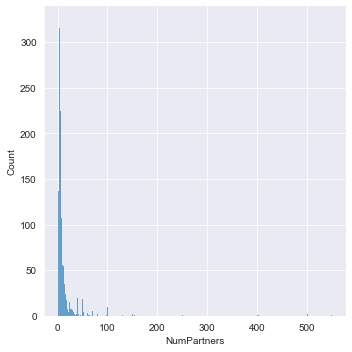

In [7]:
sns.set_style('darkgrid')
sns.displot(natsal, x="NumPartners")

* Για να αποφύγουμε τη συμπίεση του ιστογράμματος στα αριστερά λόγω των πρωταθλητών στις σχέσεις, ας περιορίσουμε το ενδιαφέρον μας στις περιπτώσεις που αναφέρουν μέχρι και 50 συντρόφους.

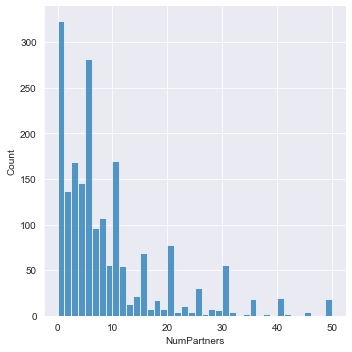

In [8]:
natsal_50 = natsal[natsal['NumPartners'] <= 50]
sns.displot(natsal_50, x="NumPartners")

* Τώρα είναι κάπως καλύτερα, αλλά θα ήταν ακόμα καλύτερο αν μεγαλώναμε λίγο το γράφημα και τη γραμματοσειρά.

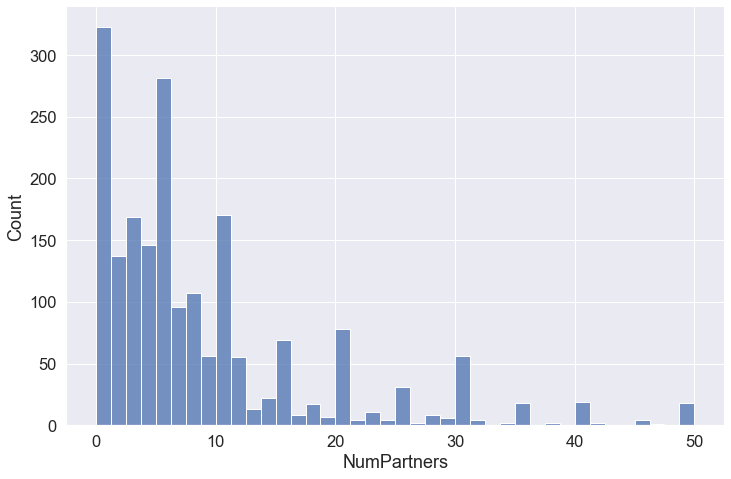

In [9]:
sns.set_theme(font_scale=1.5)
_ = sns.displot(natsal_50, x="NumPartners",
                height=7, aspect=1.5)

* Είδαμε τη συνολική εικόνα.

* Πώς συγκρίνονται άνδρες και γυναίκες;

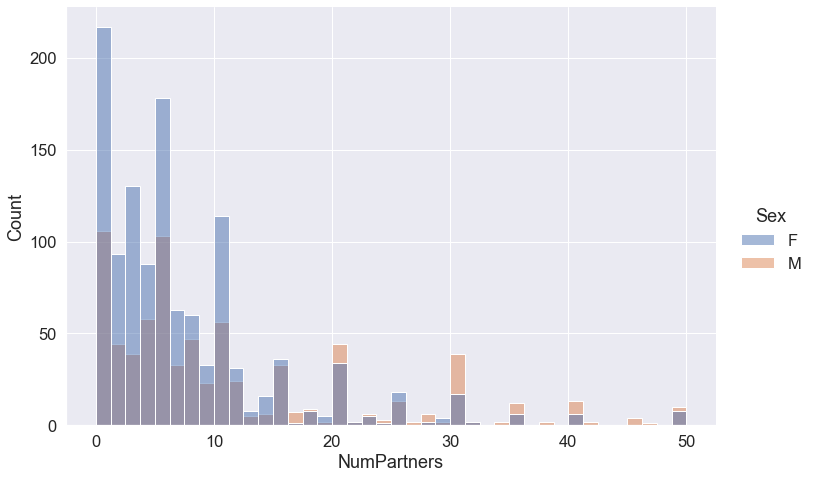

In [10]:
_ = sns.displot(natsal_50, x="NumPartners",
                hue="Sex",
                height=7, aspect=1.5)

* Ας χρησιμοποιήσουμε τα παραδοσιακά χρώματα αρσενικού-θηλυκού.

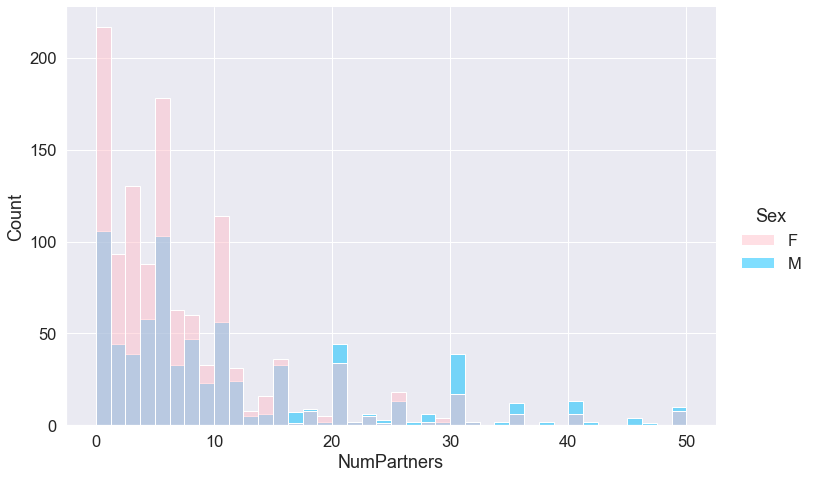

In [11]:
_ = sns.displot(natsal_50, x="NumPartners",
                hue="Sex",
                palette={'M': 'deepskyblue', 'F': 'pink'},
                height=7, aspect=1.5)

* Το κακό είναι ότι τα δύο φύλα πέφτουν το ένα πάνω στο άλλο.

* Ας τα μετακινήσουμε να είναι δίπλα-δίπλα.

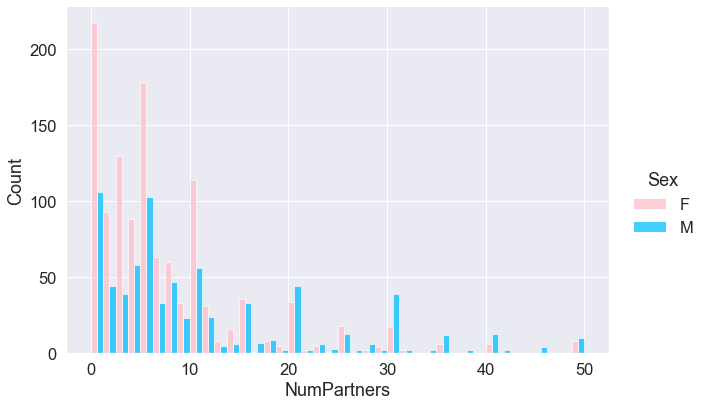

In [12]:
_ = sns.displot(natsal_50, x="NumPartners",
                hue="Sex",
                palette={'M': 'deepskyblue', 'F': 'pink'},
                multiple="dodge",
                height=6, aspect=1.5)

* Το λευκό πλαίσιο γύρω από κάθε μπάρα μπορεί να μπερδεύεται με τις λευκές γραμμές του καμβά.

* Μπορούμε να κάνουμε το πλαίσιο μαύρο.

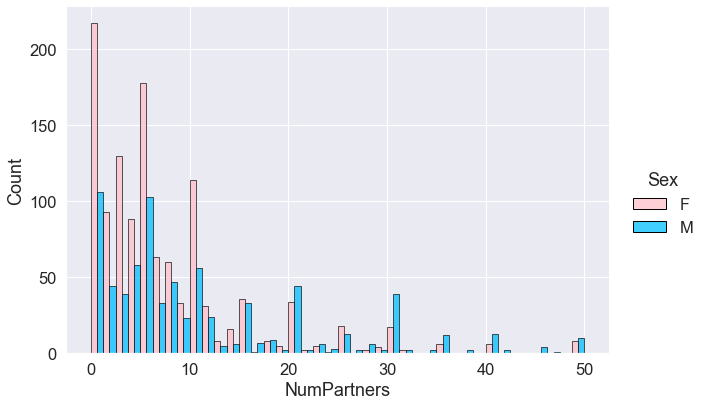

In [13]:
_ = sns.displot(natsal_50, x="NumPartners",
                hue="Sex",
                edgecolor='black', palette={'M': 'deepskyblue', 'F': 'pink'}, 
                multiple="dodge",
                height=6, aspect=1.5)

* Τη διαφορά στη κατανομή του αριθμού των συντρόφων μεταξύ ανδρών και γυναικών μπορούμε να τη δούμε καθαρά με *θηκογράμματα* (boxplots).

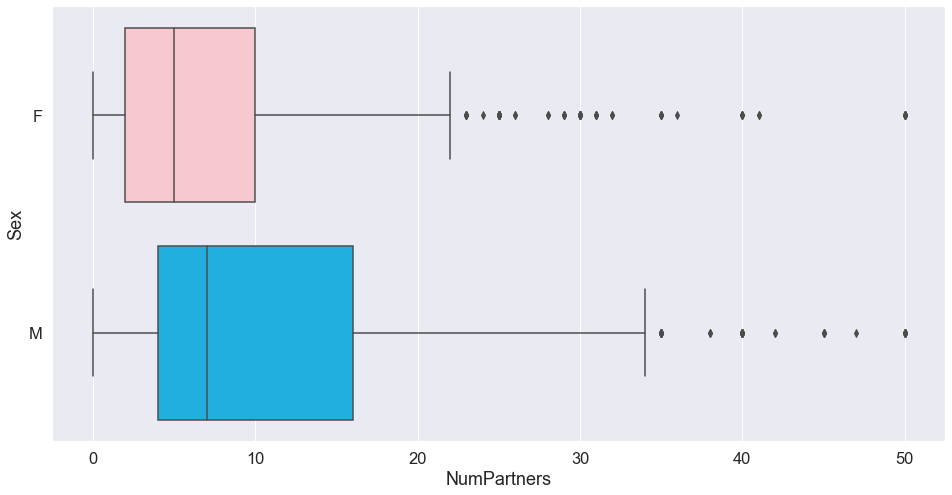

In [14]:
plt.figure(figsize=(16, 8))
_ = sns.boxplot(x=natsal_50['NumPartners'],
                y=natsal_50['Sex'],
                palette={'M': 'deepskyblue', 'F': 'pink'})

* Ένα άλλος τύπος διαγράμματος, που μπορεί να μας δώσει μια καλή εποπτεία των δεδομένων μας, είναι το *ζωνοδιάγραμμα* (stripplot).

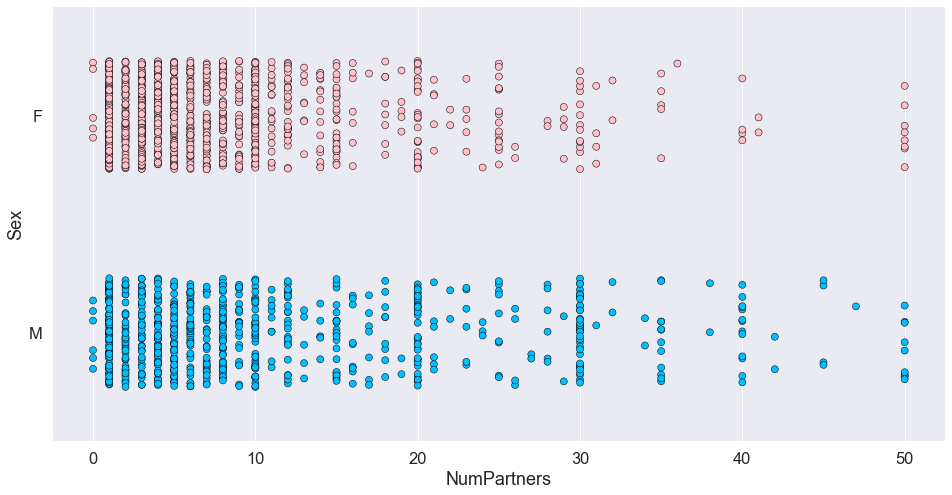

In [15]:
plt.figure(figsize=(16, 8))
_ = sns.stripplot(x=natsal_50['NumPartners'],
                  y=natsal_50['Sex'],
                  linewidth=0.5, # mark line
                  size=7, # mark size
                  jitter=.25, # spread around the middle
                  edgecolor='black', palette={'M': 'deepskyblue', 'F': 'pink'})

* Και ένας άλλος, ίσως πιο εξωτικός τύπος διαγράμματος, είναι το *βιολοδιάγραμμα* (violin plot).

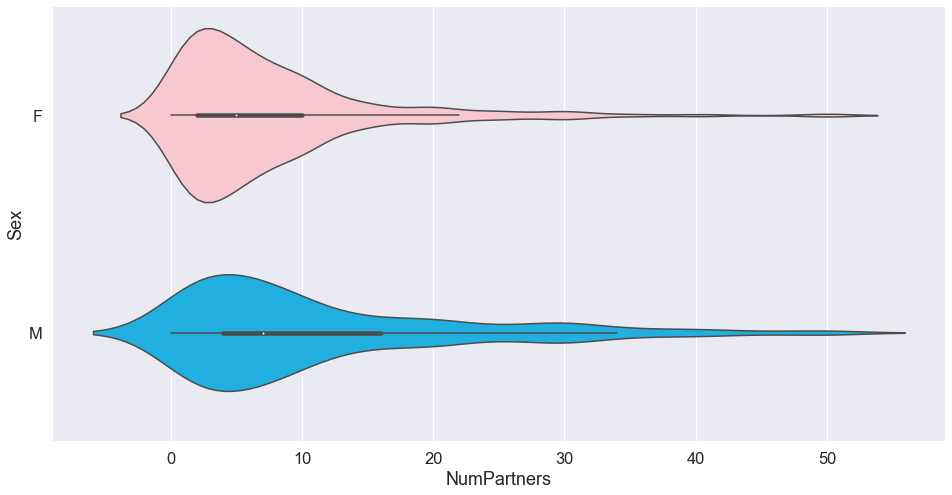

In [16]:
plt.figure(figsize=(16, 8))
_ = sns.violinplot(x=natsal_50['NumPartners'],
                   y=natsal_50['Sex'],
                   edgecolor='black',
                   palette={'M': 'deepskyblue', 'F': 'pink'})

* Όλα τα διαγράμματα δείχνουν εμφανείς διαφορές μεταξύ των αριθμών συντρόφων: οι άνδρες αναφέρουν συστηματικά περισσότερες συντρόφους από ό,τι οι γυναίκες.

* Αλλά αν θεωρήσουμε ότι μιλάμε για ένα κλειστό πληθυσμό, αυτό είναι απλώς μαθηματικώς αδύνατον!

* Άρα ή οι άνδρες ψεύδονται αναφέροντας περισσότερες συντρόφους, ή οι γυναίκες ψεύδονται αναφέροντας λιγότερους συντρόφους, ή και τα δύο.

In [17]:
natsal.groupby('Sex').describe()

NumPartners                                                  
          count       mean        std  min  25%  50%   75%    max
Sex                                                              
F        1193.0   8.230511  17.955052  0.0  2.0  5.0  10.0  550.0
M         796.0  16.978643  37.807367  0.0  4.0  8.0  20.0  501.0